In [1]:
import numpy as np
text = "<h1>Here is another example</h1>, <b>here</b> is<br/> <i>another example</i>.".lower().split()
orderedSet = sorted(set(text))
print("Ordered set: ", orderedSet)

def get_vec(len_text, word):
    empty_vector = [0] * len_text
    vect = 0
    find = np.where( np.array(orderedSet) == word)[0][0]
    empty_vector[find] = 1
    return empty_vector

def get_matrix(orderedSet):
    one_hot = []
    len_text = len(orderedSet)
    for i in text:
        vec = get_vec(len_text,i)
        one_hot.append(vec)
        
    return np.asarray(one_hot)

print ("\nTHE RESULT OF ONE-HOT ENCODING:")
print (get_matrix(orderedSet))

Ordered set:  ['<b>here</b>', '<h1>here', '<i>another', 'another', 'example</h1>,', 'example</i>.', 'is', 'is<br/>']

THE RESULT OF ONE-HOT ENCODING:
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]]


In [2]:
import numpy as np
import re

def cleanText(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    return re.sub('\W+',' ', text)

text = "<h1>Here is another example</h1>, <b>here</b> is<br/> <i>another example</i>."
text = cleanText(text)
print("Cleaned text: ", text)
text = text.lower().split()
print("Split result: ", text)
orderedSet = sorted(set(text))
print("Ordered set: ", orderedSet)

def get_vec(len_text, word):
    empty_vector = [0] * len_text
    vect = 0
    find = np.where( np.array(orderedSet) == word)[0][0]
    empty_vector[find] = 1
    return empty_vector

def get_matrix(orderedSet):
    one_hot = []
    len_text = len(orderedSet)
    for i in text:
        vec = get_vec(len_text,i)
        one_hot.append(vec)
        
    return np.asarray(one_hot)

print ("\nTHE RESULT OF ONE-HOT ENCODING:")
print (get_matrix(orderedSet))

Cleaned text:  Here is another example here is another example 
Split result:  ['here', 'is', 'another', 'example', 'here', 'is', 'another', 'example']
Ordered set:  ['another', 'example', 'here', 'is']

THE RESULT OF ONE-HOT ENCODING:
[[0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]


In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

dtype = torch.FloatTensor

# 3 Words Sentence (to simplify)
# All them form our text corpus
sentences = [ "i like rabbit", "i like dog", "i like cat", 
              "i like animal", "dog is cute", 
              "cat chases mouse", "dog is animal", 
              "cat is animal", "fish is animal",
              "dog and cat", "fish and rabbit", "i like apple", 
              "rabbit is cute", "music and movie", "watch movie", 
              "i like book", "i hate mouse", "listen to music"]

# list all the words present in our corpus
word_sequence = " ".join(sentences).split()
print(word_sequence )
# build the vocabulary
word_list = list(set(word_sequence))
print(word_list)
word_dict = {w: i for i, w in enumerate(word_list)}
print(word_dict)

['i', 'like', 'rabbit', 'i', 'like', 'dog', 'i', 'like', 'cat', 'i', 'like', 'animal', 'dog', 'is', 'cute', 'cat', 'chases', 'mouse', 'dog', 'is', 'animal', 'cat', 'is', 'animal', 'fish', 'is', 'animal', 'dog', 'and', 'cat', 'fish', 'and', 'rabbit', 'i', 'like', 'apple', 'rabbit', 'is', 'cute', 'music', 'and', 'movie', 'watch', 'movie', 'i', 'like', 'book', 'i', 'hate', 'mouse', 'listen', 'to', 'music']
['i', 'is', 'movie', 'music', 'animal', 'cute', 'rabbit', 'to', 'and', 'listen', 'chases', 'mouse', 'dog', 'hate', 'watch', 'cat', 'like', 'apple', 'book', 'fish']
{'i': 0, 'is': 1, 'movie': 2, 'music': 3, 'animal': 4, 'cute': 5, 'rabbit': 6, 'to': 7, 'and': 8, 'listen': 9, 'chases': 10, 'mouse': 11, 'dog': 12, 'hate': 13, 'watch': 14, 'cat': 15, 'like': 16, 'apple': 17, 'book': 18, 'fish': 19}


In [6]:
# Word2Vec Parameter
batch_size = 20  
embedding_size = 2  # To show 2 dim embedding graph
voc_size = len(word_list)
# input word
j = 1
print("Input word : ")
print(word_sequence[j], word_dict[word_sequence[j]])
# context words
print("Context words : ")
print(word_sequence[j - 1], word_sequence[j + 1])
print([word_dict[word_sequence[j - 1]], word_dict[word_sequence[j + 1]]])

Input word : 
like 16
Context words : 
i rabbit
[0, 6]


In [8]:
# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    input = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([input, w])


#lets plot some data
skip_grams[:6]

[[16, 0], [16, 6], [6, 16], [6, 0], [0, 6], [0, 16]]

In [9]:
np.random.seed(172)

def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        # one-hot encoding of words
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # input
        random_labels.append(data[i][1])  # context word

    return random_inputs, random_labels

random_batch(skip_grams[:6], size=3)

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.])],
 [0, 6, 0])

In [7]:
# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # parameters between -1 and + 1
        # voc_size -> embedding_size Weight
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype) 
        # embedding_size -> voc_size Weight
        self.V = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) 

    def forward(self, X):
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.V) # output_layer : [batch_size, voc_size]
        #return output_layer 
        return output_layer

model = Word2Vec()
# Set the model in train mode
model.train()
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Training
for epoch in range(5000):

    input_batch, target_batch = random_batch(skip_grams, batch_size)

    # new_tensor(data, dtype=None, device=None, requires_grad=False)
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()
    output = model(input_batch)

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 2.759658
Epoch: 2000 cost = 2.565675
Epoch: 3000 cost = 2.525607
Epoch: 4000 cost = 2.482483
Epoch: 5000 cost = 2.337673


In [9]:
# Learned W
W, _= model.parameters()
print(W.detach())

tensor([[-3.9530e-01, -1.1977e+00],
        [-1.1074e-01,  5.5578e-01],
        [-1.1224e+00, -1.7714e+00],
        [-4.7694e-01,  1.1233e-01],
        [-1.4306e+00,  3.0196e+00],
        [ 1.7081e-01, -1.3468e-01],
        [ 6.7669e-01, -1.3274e+00],
        [ 1.1087e-01, -6.3640e-01],
        [-2.3755e+00, -5.2150e-01],
        [-2.2572e+00,  5.6926e-01],
        [ 7.6038e-01, -1.1725e+00],
        [ 1.3367e+00, -3.7740e-01],
        [-1.6868e+00, -1.8745e+00],
        [ 2.3085e-03, -4.6276e-01],
        [-4.7750e-01, -7.8574e-01],
        [-1.3115e+00,  1.9129e+00],
        [ 1.0352e-01, -1.6357e+00],
        [ 2.1726e+00,  2.3673e+00],
        [ 1.1420e+00, -1.5775e+00],
        [-2.4794e+00, -1.1904e+00]])


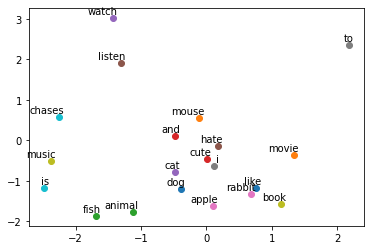

In [10]:
for i, word in enumerate(word_list):
    W, _= model.parameters()
    W = W.detach()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()